# IAPEz-int within CHM candidates 2kb

In [3]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [3]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/EarlyEmbryogenesis/CHMs
for stage in 2cell 8cell Morula ICM;do
    ln -sf /mnt/Storage/home/yanghui/imprinting/result.2021/Filtering/CpGrichedHighMethylH3K9me3/Hybrid/ChromHMM/Separate/${stage}/Output_Cooccupancy_Methyl0.5_TreatOnlyPValue0.0001_CpGNumber6/${stage}.CpGrichedHighMethylH3K9me3.merged2kb.len600bp.bed ./${stage}_200bp.CHM.bed
done

In [3]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz
awk 'BEGIN{FS=OFS="\t"}{print $0, "IAPEz-int."NR}' /mnt/Storage/home/yanghui/annotations/mm10/Repeats/LTR/ERVK/mm10_euch.IAPEz-int.merged.bed > mm10_euch.IAPEz-int.merged.num.bed

In [9]:
%%bash

win_bed(){
    cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/stage_CHMs
    process=$1
    stages=$2
    for stage in $stages;do
        windowBed -w 2000 -c -a ../mm10_euch.IAPEz-int.merged.num.bed -b ~/CHMsInOtherContexts/CellStateTransition/${process}/CHMs/${stage}_200bp.CHM.bed > IAPEz_wi_${process}_${stage}_CHM_2k.bed
    done
}


win_bed EarlyEmbryogenesis "2cell 8cell Morula ICM"
win_bed PGCsDevelopment "E10.5 E13.5_female E13.5_male"
win_bed Spermatogenesis "US DS PS RS"
win_bed RetinalDevelopment "E14.5 E17.5 P0 P3 P7 P10 P14 P21"
win_bed HeartDevelopment "E10.5 E11.5 E12.5 E13.5 E14.5 E15.5 E16.5 P0"
win_bed LiverDevelopment "E11.5 E12.5 E13.5 E14.5 E15.5 E16.5 P0"


In [5]:
stage_dict = {
    'EarlyEmbryogenesis': ['2cell','8cell','Morula','ICM',],
    'PGCsDevelopment': ['E10.5','E13.5_female','E13.5_male',],
    'Spermatogenesis': ['US','DS','PS','RS',],
    'RetinalDevelopment': ['E14.5','E17.5','P0','P3','P7','P10','P14','P21',],
    'HeartDevelopment': ['E10.5','E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0',],
    'LiverDevelopment': ['E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0']
}

In [6]:
os.chdir("/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/stage_CHMs")
IAP_ov_process_stage_df = pd.DataFrame()
i = 0
for process in stage_dict.keys() :
    for stage in stage_dict[process] :
        i += 1
        df = pd.read_csv(
            f'IAPEz_wi_{process}_{stage}_CHM_2k.bed',
            sep = "\t",
            header = None,
            usecols = [3,4]
                   )
        df.columns = ['IAP_num', f'{process}_{stage}']
        if i == 1 :
            IAP_ov_process_stage_df = df
        else :
            IAP_ov_process_stage_df = pd.merge(IAP_ov_process_stage_df, df, on = 'IAP_num')
            
IAP_ov_process_stage_df

,IAP_num,EarlyEmbryogenesis_2cell,EarlyEmbryogenesis_8cell,EarlyEmbryogenesis_Morula,EarlyEmbryogenesis_ICM,PGCsDevelopment_E10.5,PGCsDevelopment_E13.5_female,PGCsDevelopment_E13.5_male,Spermatogenesis_US,Spermatogenesis_DS,...,HeartDevelopment_E15.5,HeartDevelopment_E16.5,HeartDevelopment_P0,LiverDevelopment_E11.5,LiverDevelopment_E12.5,LiverDevelopment_E13.5,LiverDevelopment_E14.5,LiverDevelopment_E15.5,LiverDevelopment_E16.5,LiverDevelopment_P0
0,IAPEz-int.1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,IAPEz-int.2,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,IAPEz-int.3,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,0,1,1
3,IAPEz-int.4,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0
4,IAPEz-int.5,1,1,1,1,1,1,2,1,1,...,0,1,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3741,IAPEz-int.3742,2,2,2,2,2,1,2,1,1,...,1,2,2,1,1,1,1,2,2,1
3742,IAPEz-int.3743,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3743,IAPEz-int.3744,1,1,1,1,1,1,1,1,1,...,2,1,1,2,1,1,1,1,1,1
3744,IAPEz-int.3745,2,2,2,2,2,2,2,1,1,...,2,1,2,2,1,2,2,1,1,1


In [7]:
IAP_ov_process_stage_df.index = IAP_ov_process_stage_df['IAP_num']
IAP_ov_process_stage_df = IAP_ov_process_stage_df.drop('IAP_num', axis = 1)

In [8]:
IAP_ov_process_stage_df = IAP_ov_process_stage_df.mask(IAP_ov_process_stage_df > 1, 1)
IAP_ov_process_stage_df['mean'] = IAP_ov_process_stage_df.sum(axis = 1)
# IAP_ov_process_stage_df = IAP_ov_process_stage_df.sort_values(IAP_ov_process_stage_df.columns.tolist(), ascending = False)
IAP_ov_process_stage_df = IAP_ov_process_stage_df.sort_values('mean', ascending = False).drop('mean', axis = 1)
IAP_ov_process_stage_df

,EarlyEmbryogenesis_2cell,EarlyEmbryogenesis_8cell,EarlyEmbryogenesis_Morula,EarlyEmbryogenesis_ICM,PGCsDevelopment_E10.5,PGCsDevelopment_E13.5_female,PGCsDevelopment_E13.5_male,Spermatogenesis_US,Spermatogenesis_DS,Spermatogenesis_PS,...,HeartDevelopment_E15.5,HeartDevelopment_E16.5,HeartDevelopment_P0,LiverDevelopment_E11.5,LiverDevelopment_E12.5,LiverDevelopment_E13.5,LiverDevelopment_E14.5,LiverDevelopment_E15.5,LiverDevelopment_E16.5,LiverDevelopment_P0
IAP_num,,,,,,,,,,,,,,,,,,,,,
IAPEz-int.1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPEz-int.2439,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPEz-int.2426,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPEz-int.2427,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPEz-int.2428,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IAPEz-int.3123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IAPEz-int.3467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IAPEz-int.920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


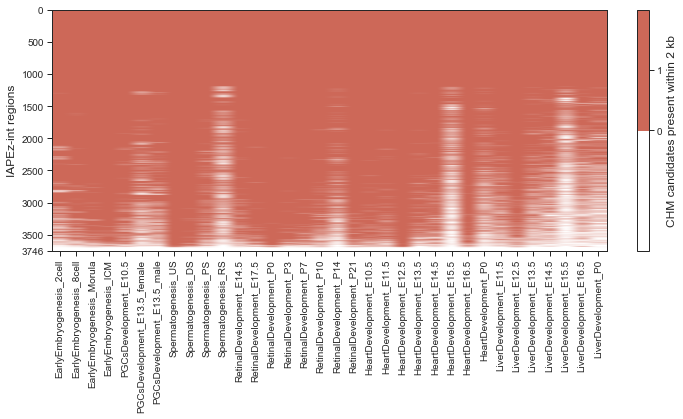

In [71]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    

    colors = ['#FFFFFF', '#CD6858']
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("mycmap", colors)
    fig, ax = plt.subplots(figsize = (6.4 * 1.5, 4.8 * .618 * 2), tight_layout = True)

    # Draw the heatmap with the mask and correct aspect ratio
    
    pos = ax.imshow(IAP_ov_process_stage_df,
                  aspect = 'auto',
                  vmax = 1,
                  vmin = 0,
                  cmap = cmap1
                )
    
    cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[0, 1], boundaries = [-1,0,2], fraction=0.03, pad=0.05)
    cbar.set_label('CHM candidates present within 2 kb')
    cbar.ax.set_yticklabels([0, 1]) 

    ax.set_yticks(list(range(0, IAP_ov_process_stage_df.shape[0], 500)) + [IAP_ov_process_stage_df.shape[0]])
    ax.set_ylabel('IAPEz-int regions')
    ax.set_xticks(range(0, IAP_ov_process_stage_df.shape[1]))
    ax.set_xticklabels(IAP_ov_process_stage_df.columns, rotation = 90)

    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make15_heatmap_IAP_process_stage_CHMnum.pdf',transparent=True)


In [9]:
IAP_woCHM = IAP_ov_process_stage_df.loc[IAP_ov_process_stage_df.sum(axis = 1) == 0].reset_index()
IAP_num_bed = pd.read_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/mm10_euch.IAPEz-int.merged.num.bed',
    sep = "\t",
    header = None,
    names = ['chr', 'start', 'end', 'IAP_num']
                    )
IAP_woCHM = pd.merge(IAP_woCHM.iloc[:,0], IAP_num_bed, on = "IAP_num")
IAP_woCHM['order'] = IAP_woCHM['IAP_num'].str.split('.', expand = True)[1].astype(int)
IAP_woCHM = IAP_woCHM.sort_values(['order'])
IAP_woCHM[['chr', 'start', 'end', 'IAP_num']].to_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/stage_CHMs/IAPEz-int_nonCHMnearby_2kb.bed',
    sep = "\t",
    header = False,
    index = False
)
IAP_woCHM

,IAP_num,chr,start,end,order
12,IAPEz-int.663,chr12,3189602,3189724,663
26,IAPEz-int.789,chr12,82444985,82445065,789
6,IAPEz-int.896,chr13,23593760,23593890,896
10,IAPEz-int.919,chr13,33515356,33515488,919
37,IAPEz-int.920,chr13,33517991,33518451,920
32,IAPEz-int.993,chr13,80104429,80104749,993
15,IAPEz-int.1415,chr15,82742872,82742951,1415
0,IAPEz-int.1416,chr15,82744277,82744907,1416
34,IAPEz-int.1661,chr17,35277800,35278069,1661
18,IAPEz-int.1872,chr18,84276602,84276697,1872


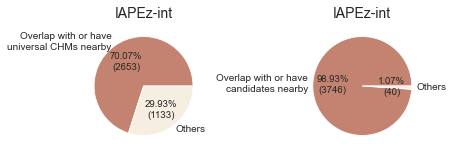

In [27]:
### pie plot
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, absolute)


IAP_woCHM = pd.read_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/stage_CHMs/IAPEz-int_nonCHMnearby_2kb.bed',
    sep = "\t", header = None, 
)
IAP_num_bed = pd.read_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/mm10_euch.IAPEz-int.merged.num.bed',
    sep = "\t",
    header = None,
    names = ['chr', 'start', 'end', 'IAP_num'])

IAP_universal = pd.read_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/IAPEz_universalCHM_overlap.bed',
    sep = "\t", header = None,
)



with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1,2, figsize = (6.4, 4.8), tight_layout = True)
    
    sizes1 = [IAP_universal.shape[0], IAP_num_bed.shape[0] - IAP_universal.shape[0]]
    axes[0].pie(sizes1, 
           explode = [0, 0],
           labels = [f'Overlap with or have\nuniversal CHMs nearby', f'Others'],
           autopct=lambda pct: func(pct, sizes),
           shadow = False, 
           startangle = 0,
           colors = ['#C38370', '#F6EEE0'],
          )
    axes[0].set_title('IAPEz-int')
    
    sizes2 = [IAP_num_bed.shape[0] - IAP_woCHM.shape[0], IAP_woCHM.shape[0]]
    axes[1].pie(sizes2, 
           explode = [0, 0],
           labels = [f'Overlap with or have\ncandidates nearby', f'Others'],
           autopct=lambda pct: func(pct, sizes),
           shadow = False, 
           startangle = 0,
           colors = ['#C38370', '#F6EEE0']
          )
    axes[1].set_title('IAPEz-int')
    
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make15_pie_IAPEz_universalCHM_candidateCHM.pdf', transparent = True)
     
